# Detect CHARUCO board corners

(latest version on Github at https://github.com/tytell/tytell-lab.git)
This file from commit $Id$

Requires `aniposelib`. Assuming you already have Anaconda python set up, you can install `aniposelib` with 
> % python -m pip install aniposelib

Also requires the Python interface to OpenCV. This should install as part of your normal Anaconda installation, but if it didn't, you can use
> % conda install opencv

Everything else should be standard Python install


In [15]:
import os
import aniposelib
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

Set up to detect a CHaRuCO board. Make sure you identify the number of squares and their size in mm. The numbers below should be correct for the board we have in the lab.

`marker_length`, `marker_bits`, and `dict_size` are particular to the sort of CHaRuCO board that we have in the lab. Don't change them unless you know what you're doing.

In [16]:
board = aniposelib.boards.CharucoBoard(squaresX=6, squaresY=6,
                                        square_length=24.33, marker_length=17, marker_bits=5, dict_size=50)

Fill in the path and the names of video files that have the CHaRuCO images. For paths on Windows machines, be careful not to remove the `r` at the beginning of the quote; without it, all backslashes will be registered as special characters.

In [17]:
videopath = r'/Volumes/Data/Field video/Raw data/White shoes/synced'
videonames = ['GX010018.mp4', 'GX010036.mp4']

This will detect points in the first video, just for testing purposes.

In [18]:
video1 = os.path.join(videopath, videonames[0])
rows = board.detect_video(video1, progress=True)

100%|█████████████████████████████| 1199/1199 [00:14<00:00, 84.28it/s]


This is how many frames were detected.

In [19]:
len(rows)

172

## Check detected corners

This will load in a frame from the video and show the detected corners.

In [20]:
cap = cv2.VideoCapture(video1)

You can change `i` to look at a different frame

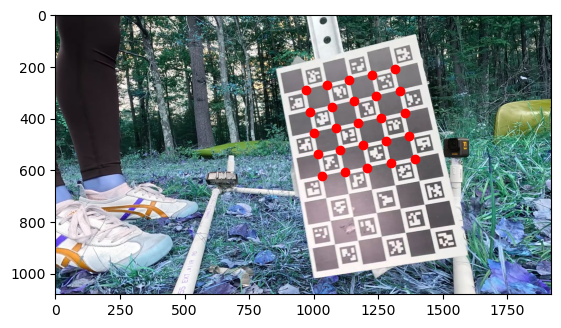

In [23]:
i = 100
fr = rows[i]['framenum']

cap.set(1, fr)
ret, frame = cap.read()

fig, ax = plt.subplots()
ax.imshow(frame)
ax.plot(rows[i]['corners'][:,0,0], rows[i]['corners'][:,0,1], 'ro')

Don't forget to run the code block below to close the video file.

In [24]:
cap.release()

## Detect corners in all videos

This will run through all of the videos and detect the corners.

In [25]:
camdf = []

for camnum, video1 in enumerate(videonames):
    print(video1)
    fn = os.path.join(videopath, video1)

    rows = board.detect_video(fn, progress=True)

    for row1 in rows:
        df1 = pd.DataFrame(data={'id': row1['ids'][:,0], 'x': row1['corners'][:,0,0], 'y': row1['corners'][:,0,1]})
        df1['frame'] = row1['framenum']
        df1['camera'] = camnum
        camdf.append(df1)


GX010018.mp4


100%|█████████████████████████████| 1199/1199 [00:12<00:00, 92.74it/s]


GX010036.mp4


100%|█████████████████████████████| 1199/1199 [00:28<00:00, 42.15it/s]


Merge the data frames.

In [26]:
dfall = pd.concat(camdf, ignore_index=True)

Look at the beginning of the data set.

In [27]:
dfall.head()

,id,x,y,frame,camera
0,0,1247.718994,356.448120,360,0
1,1,1289.341797,347.062866,360,0
2,2,1328.935181,337.849213,360,0
3,3,1367.311035,329.618530,360,0
4,5,1259.016968,411.650940,360,0


And at the end. You should see x y points for multiple frames and multiple cameras.

In [28]:
dfall.tail()

,id,x,y,frame,camera
13595,3,1210.105835,440.816101,1040,1
13596,4,1232.416138,448.833496,1040,1
13597,7,1164.040405,443.957184,1040,1
13598,8,1186.592041,454.878815,1040,1
13599,13,1162.149048,468.274200,1040,1


And save them all to CSV.

In [29]:
dfall.to_csv(os.path.join(videopath, os.path.join(videopath,'boards.csv')))

Next step: Run the R notebook `rearrange_point_for_easywand.Rmd` to rearrange the points in the CSV file so that EasyWand can load them in.